In [2]:
import optuna
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load dataset
train = pd.read_csv('/kaggle/input/forest-type-classification-spai/train.csv')

In [4]:
train

,id,b1,b11,b12,b2,b3,b4,b5,b6,b7,b8,b8_a,b9,nforest_type
0,2002,293,1927,1038,278,475,453,987,1773,2184,1900,2343,3039,MDF
1,3212,197,1598,697,201,347,228,682,1982,2449,2254,2685,2690,DDF
2,13312,929,1975,1031,982,1020,856,1220,2051,2421,2392,2671,2683,MDF
3,17020,132,1560,689,189,408,175,609,2117,2907,3024,3005,2955,MDF
4,5967,241,1944,1131,362,538,487,918,1549,1844,1702,2077,2043,MDF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13048,9185,374,1940,1054,382,565,498,977,1678,1929,2109,2291,2100,DDF
13049,13977,1983,3602,2720,1622,1782,1766,2314,3488,3900,3924,4097,6053,DDF
13050,755,940,2007,1148,975,1080,968,1252,1780,1983,1942,2247,2170,DDF
13051,1616,1174,2312,1190,1112,1126,889,1310,2511,3085,3050,3396,3380,MDF


In [5]:
# def NDVI(df):
#     NDVI_series = (df['b8'] - df['b4']) / (df['b8'] + df['b4'])
#     return NDVI_series
    
# def Moisture_index(df):
#     Moist = (df['b8_a'] - df['b11']) / (df['b8_a'] + df['b11'])
#     return Moist

def NDWI(df):
    NDWI_series = (df['b3'] - df['b8']) / (df['b3'] + df['b8'])
    return NDWI_series

def NDSI(df):
    NDSI_series = (df['b3'] - df['b11']) / (df['b3'] + df['b11'])
    return NDSI_series

def BSI(df):
    bsi_index = ((df['b11'] + df['b4']) - (df['b8'] + df['b2'])) / ((df['b11'] + df['b4']) + (df['b8'] + df['b2']))
    return bsi_index
    
def NBR1(df):
    return (df['b8'] - df['b11']) / (df['b8'] + df['b11'])

def NBR3(df):
    return (df['b8'] - df['b12']) / (df['b8'] + df['b12'])

def NBR4(df):
    return (df['b8_a'] - df['b12']) / (df['b8_a'] + df['b12'])

def AFRI1(df):
    return (df['b8'] - (0.66 * df['b11'])) / (df['b8'] + (0.66 * df['b11']))

def AFRI2(df):
    return (df['b8_a'] - (0.66 * df['b11'])) / (df['b8_a'] + (0.66 * df['b11']))

def AFRI3(df):
    return (df['b8'] - (0.66 * df['b12'])) / (df['b8'] + (0.66 * df['b12']))

def AFRI4(df):
    return (df['b8_a'] - (0.66 * df['b12'])) / (df['b8_a'] + (0.66 * df['b12']))

def BNDVI1(df):
    return (df['b8'] - df['b2']) / (df['b8'] + df['b2'])

def BNDVI2(df):
    return (df['b8_a'] - df['b2']) / (df['b8_a'] + df['b2'])

def BWDRVI1(df):
    return ((0.1 * df['b8']) - df['b2']) / ((0.1 * df['b8']) + df['b2'])

def BWDRVI2(df):
    return ((0.1 * df['b8_a']) - df['b2']) / ((0.1 * df['b8_a']) + df['b2'])

def NDVI1(df):
    return (df['b8'] - df['b4']) / (df['b8'] + df['b4'])

def NDVI2(df):
    return (df['b8_a'] - df['b4']) / (df['b8_a'] + df['b4'])

def WDRVI1(df):
    return ((0.1 * df['b8']) - df['b4']) / ((0.1 * df['b8']) + df['b4'])

def WDRVI2(df):
    return ((0.1 * df['b8_a']) - df['b4']) / ((0.1 * df['b8_a']) + df['b4'])

def SAVI1(df):
    return ((1 + 0.5) * (df['b8'] - df['b4'])) / (df['b8'] + df['b4'] + 0.5)

def SAVI2(df):
    return ((1 + 0.5) * (df['b8_a'] - df['b4'])) / (df['b8_a'] + df['b4'] + 0.5)

def GNDVI1(df):
    return (df['b8'] - df['b3']) / (df['b8'] + df['b3'])

def GNDVI2(df):
    return (df['b8_a'] - df['b3']) / (df['b8_a'] + df['b3'])

def NDRE1(df):
    return (df['b8'] - df['b5']) / (df['b8'] + df['b5'])

def NDRE2(df):
    return (df['b8'] - df['b6']) / (df['b8'] + df['b6'])

def NDRE3(df):
    return (df['b8'] - df['b7']) / (df['b8'] + df['b7'])

def NDRE4(df):
    return (df['b8_a'] - df['b5']) / (df['b8_a'] + df['b5'])

def NDRE5(df):
    return (df['b8_a'] - df['b6']) / (df['b8_a'] + df['b6'])

def NDRE6(df):
    return (df['b8_a'] - df['b7']) / (df['b8_a'] + df['b7'])

def VIgreen(df):
    return (df['b3'] - df['b4']) / (df['b3'] + df['b4'])

def CIgreen1(df):
    return (df['b8'] / df['b3']) - 1

def CIgreen2(df):
    return (df['b8_a'] / df['b3']) - 1

def CIrededge1(df):
    return (df['b8'] / df['b5']) - 1

def CIrededge2(df):
    return (df['b8'] / df['b6']) - 1

def CIrededge3(df):
    return (df['b8'] / df['b7']) - 1

def CIrededge4(df):
    return (df['b8_a'] / df['b5']) - 1

def CIrededge5(df):
    return (df['b8_a'] / df['b6']) - 1

def CIrededge6(df):
    return (df['b8_a'] / df['b7']) - 1

def CI(df):
    return (df['b4'] - df['b2']) / df['b4']

def CVI1(df):
    return df['b8'] * (df['b4'] / (df['b3']^2))

def CVI2(df):
    return df['b8_a'] * (df['b4'] / (df['b3']^2))

def CCCI1(df):
    return ((df['b8'] - df['b5']) / (df['b8'] + df['b5'])) / ((df['b8'] - df['b4']) / (df['b8'] + df['b4']))

def CCCI2(df):
    return ((df['b8'] - df['b6']) / (df['b8'] + df['b6'])) / ((df['b8'] - df['b4']) / (df['b8'] + df['b4']))

def CCCI3(df):
    return ((df['b8'] - df['b7']) / (df['b8'] + df['b7'])) / ((df['b8'] - df['b4']) / (df['b8'] + df['b4']))

def CCCI4(df):
    return ((df['b8_a'] - df['b5']) / (df['b8_a'] + df['b5'])) / ((df['b8_a'] - df['b4']) / (df['b8_a'] + df['b4']))

def CCCI5(df):
    return ((df['b8_a'] - df['b6']) / (df['b8_a'] + df['b6'])) / ((df['b8_a'] - df['b4']) / (df['b8_a'] + df['b4']))

def CCCI6(df):
    return ((df['b8_a'] - df['b7']) / (df['b8_a'] + df['b7'])) / ((df['b8_a'] - df['b4']) / (df['b8_a'] + df['b4']))

def EVI1(df):
    return 2.5 * ((df['b8'] - df['b4']) / (df['b8'] + (6 * df['b4']) - (7.5 * df['b2']) + 1))

def EVI2(df):
    return 2.5 * ((df['b8_a'] - df['b4']) / (df['b8_a'] + (6 * df['b4']) - (7.5 * df['b2']) + 1))

def GARI1(df):
    return (df['b8'] - (df['b3'] - (df['b2'] - df['b4']))) / (df['b8'] - (df['b3'] + (df['b2'] - df['b4'])))

def GARI2(df):
    return (df['b8_a'] - (df['b3'] - (df['b2'] - df['b4']))) / (df['b8_a'] - (df['b3'] + (df['b2'] - df['b4'])))

def GLI(df):
    return ((2 * df['b3']) - (df['b4'] + df['b2'])) / ((2 * df['b3']) + (df['b4'] + df['b2']))

def GBNDVI1(df):
    return (df['b8'] - (df['b3'] + df['b2'])) / (df['b8'] + (df['b3'] + df['b2']))

def GBNDVI1(df):
    return (df['b8_a'] - (df['b3'] + df['b2'])) / (df['b8_a'] + (df['b3'] + df['b2']))

def GRNDVI1(df):
    return (df['b8'] - (df['b3'] + df['b4'])) / (df['b8'] + (df['b3'] + df['b4']))

def GRNDVI2(df):
    return (df['b8_a'] - (df['b3'] + df['b4'])) / (df['b8_a'] + (df['b3'] + df['b4']))

def SLAVI1(df):
    return df['b8'] / (df['b4'] + df['b11'])

def SLAVI2(df):
    return df['b8_a'] / (df['b4'] + df['b11'])

def SLAVI3(df):
    return df['b8'] / (df['b4'] + df['b12'])

def SLAVI4(df):
    return df['b8_a'] / (df['b4'] + df['b12'])

In [6]:
# List of function names and function references
functions_name_list = [
    "NDWI", "NDSI", "BSI", 
    "NBR1", "NBR3", "NBR4", 
    "AFRI1", "AFRI2", "AFRI3", "AFRI4", 
    "BNDVI1", "BNDVI2", "BWDRVI1", "BWDRVI2", 
    "NDVI1", "NDVI2", "WDRVI1", "WDRVI2", "SAVI1", "SAVI2", "GNDVI1", 
    "GNDVI2", 
    "NDRE1", "NDRE2", "NDRE3", "NDRE4", "NDRE5", "NDRE6", "VIgreen", "CIgreen1", 
    "CIgreen2", "CIrededge1", "CIrededge2", "CIrededge3", "CIrededge4", "CIrededge5", 
    "CIrededge6", "CI", "CVI1", "CVI2", "CCCI1", "CCCI2", "CCCI3", "CCCI4", 
    "CCCI5", "CCCI6", "EVI1", "EVI2", "GARI1", "GARI2", 
    "GLI", "GBNDVI1", 
    "GBNDVI1", "GRNDVI1", "GRNDVI2", "SLAVI1", "SLAVI2", "SLAVI3", "SLAVI4"
]

functions_list = [
    NDWI, NDSI, BSI, 
    NBR1, NBR3, NBR4, 
    AFRI1, AFRI2, AFRI3, AFRI4, 
    BNDVI1, BNDVI2, BWDRVI1, BWDRVI2, 
    NDVI1, NDVI2, WDRVI1, WDRVI2, SAVI1, SAVI2, GNDVI1, 
    GNDVI2, 
    NDRE1, NDRE2, NDRE3, NDRE4, NDRE5, NDRE6, VIgreen, CIgreen1, 
    CIgreen2, CIrededge1, CIrededge2, CIrededge3, CIrededge4, CIrededge5, 
    CIrededge6, CI, CVI1, CVI2, CCCI1, CCCI2, CCCI3, CCCI4, 
    CCCI5, CCCI6, EVI1, EVI2, GARI1, GARI2, 
    GLI, GBNDVI1, 
    GBNDVI1, GRNDVI1, GRNDVI2, SLAVI1, SLAVI2, SLAVI3, SLAVI4
]

# Perform feature engineering
train_featureEng = train.copy()
for i, func in enumerate(functions_list):
    train_featureEng[functions_name_list[i]] = func(train_featureEng)

In [7]:
# Prepare data for training
X = train_featureEng.drop('nforest_type', axis=1)
y = train_featureEng['nforest_type']

In [8]:
# Encode target labels if necessary
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=40)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Define the objective function for Optuna
def objective(trial):
    params = {
        'C': trial.suggest_float('C', 1e-3, 1e3, log=True),
        'kernel': trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),
        'degree': trial.suggest_int('degree', 2, 5),  # Only used for 'poly' kernel
        'gamma': trial.suggest_categorical('gamma', ['scale', 'auto']),  # Kernel coefficient
        'coef0': trial.suggest_float('coef0', 0.0, 1.0),  # Only used for 'poly' and 'sigmoid'
    }
    svc = SVC(**params)
    
    # Cross-validation
    cv_scores = cross_val_score(svc, X_train_scaled, y_train, cv=3, scoring='accuracy')
    return np.mean(cv_scores)

In [14]:
# Create the Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_params = study.best_params
print('Best hyperparameters:', best_params)

[I 2024-06-05 06:39:26,867] A new study created in memory with name: no-name-c6cda4e6-d737-494a-89af-fee3d9dfcb2e
[I 2024-06-05 06:39:42,475] Trial 0 finished with value: 0.6659650197404411 and parameters: {'C': 0.6619912488234154, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'coef0': 0.05749738508865543}. Best is trial 0 with value: 0.6659650197404411.
[I 2024-06-05 06:40:05,859] Trial 1 finished with value: 0.450105333716365 and parameters: {'C': 0.0011068182031914312, 'kernel': 'sigmoid', 'degree': 3, 'gamma': 'auto', 'coef0': 0.5329747803512346}. Best is trial 0 with value: 0.6659650197404411.
[I 2024-06-05 06:40:25,459] Trial 2 finished with value: 0.47739868096211396 and parameters: {'C': 0.011662907791469824, 'kernel': 'rbf', 'degree': 4, 'gamma': 'auto', 'coef0': 0.7612290562957698}. Best is trial 0 with value: 0.6659650197404411.
[I 2024-06-05 06:40:46,567] Trial 3 finished with value: 0.4933927032461936 and parameters: {'C': 0.030437959399070055, 'kernel': 'sigmoid', 'degre

Best hyperparameters: {'C': 240.70471073773453, 'kernel': 'poly', 'degree': 2, 'gamma': 'scale', 'coef0': 0.7957826959370304}


In [9]:
best_params = {'C': 240.70471073773453, 'kernel': 'poly', 'degree': 2, 'gamma': 'scale', 'coef0': 0.7957826959370304}

In [10]:
# Train the final model with the best hyperparameters
best_svc = SVC(**best_params)
best_svc.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_svc.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       893
           1       0.79      0.67      0.72       553
           2       0.68      0.73      0.70      1165

    accuracy                           0.69      2611
   macro avg       0.70      0.68      0.69      2611
weighted avg       0.69      0.69      0.69      2611

Confusion Matrix:
[[569  41 283]
 [ 63 369 121]
 [256  55 854]]


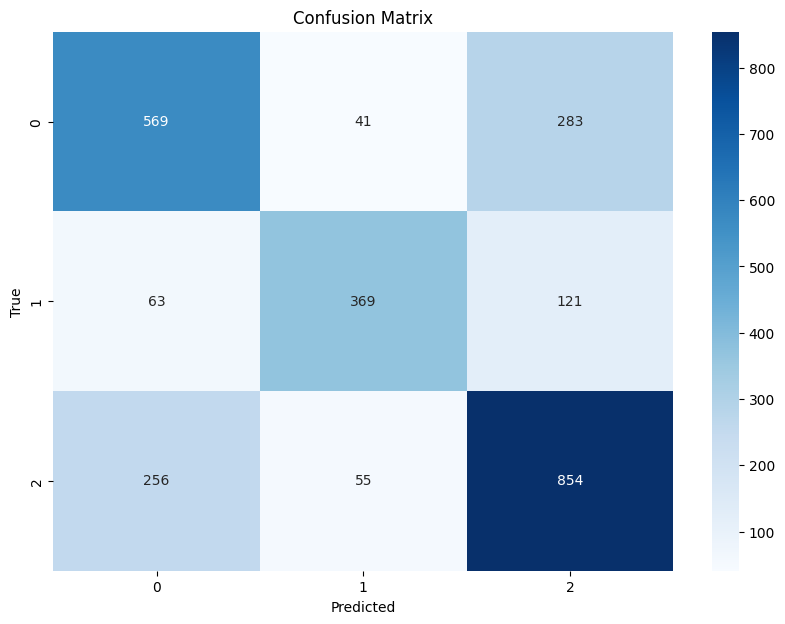

In [11]:
# Visualization of the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Load test dataset
test_df = pd.read_csv('/kaggle/input/forest-type-classification-spai/test.csv')

# Apply feature engineering to the test set
test_featureEng = test_df.copy()
for i, func in enumerate(functions_list):
    test_featureEng[functions_name_list[i]] = func(test_featureEng)

# Scale the test set
X_test_final_scaled = scaler.transform(test_featureEng)

# Make predictions on the test set
test_predictions = best_svc.predict(X_test_final_scaled)

# Convert numeric predictions back to original string labels
test_predictions_labels = label_encoder.inverse_transform(test_predictions)

# Create a DataFrame for the predictions
output = pd.DataFrame({'Id': test_df.index, 'Predicted': test_predictions_labels})
output

,Id,Predicted
0,0,DEF
1,1,MDF
2,2,MDF
3,3,DDF
4,4,DDF
...,...,...
3995,3995,DDF
3996,3996,MDF
3997,3997,DDF
3998,3998,MDF


In [16]:
# Load sample submission file
sample_submission = pd.read_csv('/kaggle/input/forest-type-classification-spai/sample_submission.csv')

# Create submission DataFrame
submission = pd.DataFrame({'id': sample_submission['id'], 'nforest_type': test_predictions_labels})
submission

# # Save the submission DataFrame to a CSV file
submission.to_csv('test-SVM.csv', index=False)
submission

,id,nforest_type
0,13467,DEF
1,12719,MDF
2,1054,MDF
3,13747,DDF
4,9453,DDF
...,...,...
3995,115,DDF
3996,10654,MDF
3997,5718,DDF
3998,13054,MDF
